## Lab | Customer Analysis Round 2


For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

#### Dealing with the data
- Show the dataframe shape.
- Standardize header names.
- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values.
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

data.shape

(10910, 26)

In [2]:
col=[]
for columns in data.columns:
    col.append(columns.lower())
data.columns=col


list(data.columns)

data.columns = data.columns

data=data.rename(columns={'employmentstatus':'employment status'})

list(data.columns)

data.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
data.dtypes

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [4]:
data.select_dtypes(['int64','float64'])

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [5]:
data.select_dtypes(['object'])

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [6]:
data.isna().sum()

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [7]:
data2 = data.copy()

data2= data2[data2['state'].isna()==False]

data2.isna().sum()

unnamed: 0                          0
customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           591
months since policy inception       0
number of open complaints         591
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     591
vehicle size                      591
vehicle type                     5164
dtype: int64

In [8]:
# for "month since last claim" it might make sense, that value is NULL since there might never been one -> keep it

# number of open complaints NaN -> set to 0
data2['number of open complaints'] = data2['number of open complaints'].fillna(0)

# vehicle type ignore - missing values since it's either A or empty
data2['vehicle type'].unique()

# depending on needs we can delete rows with missing values for vehicle class/vehicle size
data2['vehicle class'].unique()
data2['vehicle size'].unique()

# Executed for data3
data3= data2[data2['vehicle class'].isna()==False]

data3.isna().sum()
data3.shape

(9688, 26)

In [9]:
data3['effective to date'] = pd.to_datetime(data3['effective to date'],errors='coerce')

data3['month'] = data3['effective to date'].dt.month

display(data3[['month']])

/var/folders/gg/ydzntksx7jl3t92y3_bqsw140000gn/T/ipykernel_47775/4269560026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['effective to date'] = pd.to_datetime(data3['effective to date'],errors='coerce')
/var/folders/gg/ydzntksx7jl3t92y3_bqsw140000gn/T/ipykernel_47775/4269560026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['month'] = data3['effective to date'].dt.month


,month
0,2
1,1
2,2
3,1
4,1
...,...
10904,2
10905,1
10906,1
10907,2


print(df.shape)

df.columns=[col.lower() for col in df.columns]

print("The numerical columns are: ", df.select_dtypes(np.number))

print("The numerical columns are: ", df.select_dtypes(np.object))

print("The df contains this missing values: ", df.isna().sum())

df['effective to date'] = pd.to_datetime(df['effective to date'],errors='coerce')

df['month'] = df['effective to date'].dt.month

display(df[['month']])

In [10]:
def bonus (df):
    print(df.shape)

    df.columns=[col.lower() for col in df.columns]

    print("The numerical columns are: ", df.select_dtypes(np.number))

    print("The numerical columns are: ", df.select_dtypes(np.object))

    print("The df contains this missing values: ", df.isna().sum())

    df['effective to date'] = pd.to_datetime(df['effective to date'],errors='coerce') 
    df['month'] = df['effective to date'].dt.month 
    display(df[['month']])

### Lab | Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

Get the data
Use the same jupyter file from the last lab, Customer Analysis Round 3

##### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [11]:
# Show DataFrame info. 
data2=data.copy()
data2.info()
data2.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employment status              10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [12]:
# Describe DataFrame.
display(data2.describe())
display(data2.head())

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Number of responses:  1466
Number of no response:  8813


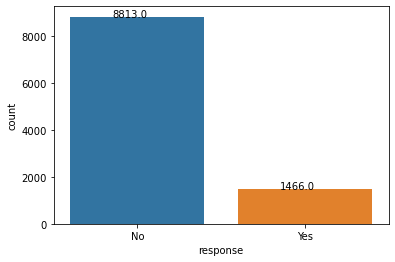

In [14]:
# Show a plot of the total number of responses.
print('Number of responses: ',data2[data2['response']=='Yes'].shape[0])
print('Number of no response: ',data2[data2['response']=='No'].shape[0])

ax = sns.countplot(x='response',data=data2)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25,p.get_height()+0.1))

<AxesSubplot:xlabel='response', ylabel='Count'>

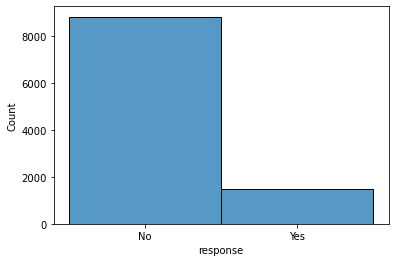

In [15]:
sns.histplot(data2, x='response')

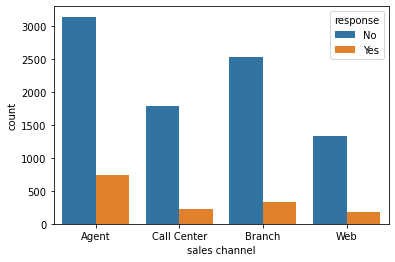

In [16]:
# Show a plot of the response rate by the sales channel.

ax = sns.countplot(x='sales channel',hue='response', data=data2)

In [55]:
#response_rate
print("The number of responses is: ", data2[data2['response']=='Yes'].shape[0])
print("The number of no responses is: ",data2[(data2['response'].isin(['Yes','No']))].shape[0])

print("The average response rate is: ",
round((data2[data2['response']=='Yes'].shape[0]/data2[(data2['response'].isin(['Yes','No']))].shape[0])*100,2))



    
#replace yes and no by 1 and 0

data3=data2.copy()
data3=data3.replace({'response':{'Yes':1,'No':0}})
display(data3.head())

list(data3['response'].unique())

The number of responses is:  1466
The number of no responses is:  10279
The average response rate is:  14.26


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,0.0,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,0.0,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,0.0,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,1.0,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,0.0,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


[0.0, 1.0, nan]

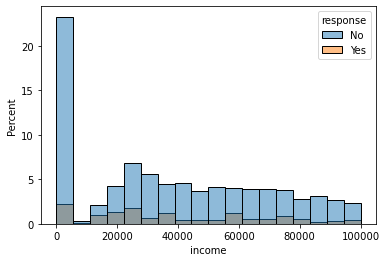

In [60]:
#Show a plot of the response rate by the total claim amount.

a = sns.histplot(data2, x='income',stat='percent',hue='response')

0.13437213565536205


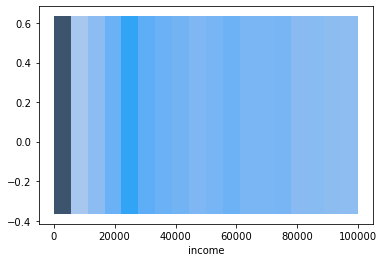

In [71]:
sns.histplot(data=data3, x=data3['income'], y=data3['response'].sum()/data3['response'].shape[0])

print(data3['response'].sum()/data3['response'].shape[0])

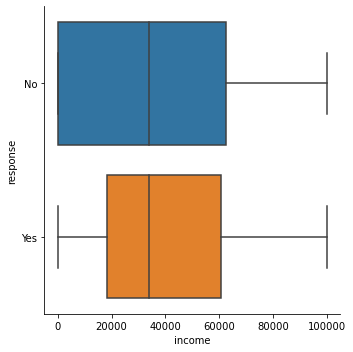

In [64]:
#Show a plot of the response rate by income.

sns.catplot(x="income",y="response", data=data2, kind='box')



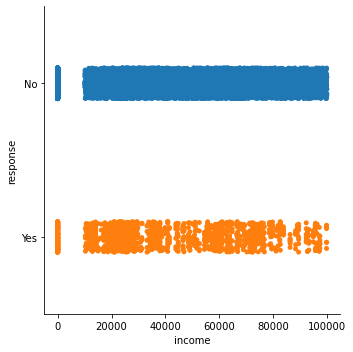

In [63]:
sns.catplot(x="income",y="response", data=data2)